> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser type in the console:


> `> ipython nbconvert [this_notebook.ipynb] --to slides --post serve`


> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View --> Cell Toolbar --> None`

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Hierarchical Clustering

_Authors: David Yerrington (SF)_

---

![](https://snag.gy/J8iyBj.jpg)

### Learning Objectives
*After this lesson, you will be able to:*
- Understand the differences between K-Means and hierarchical clustering
- Understand how the "single" linkage method is used to create a dendrogram
- Plot, analyze, and understand how to use a Dendrogram
- Learn about the cophenetic correlation coefficient

### Lesson Guide
- [What is hierarchical clustering?](#what-is)
- [When does hierarchical clustering perform well?](#when)
- [How is hierarchical clustering different from K-Means clustering?](#how)
- [How does hierarchical clustering work?](#how-work)
- [Single linkage: step-by-step](#single)
- [Hierarchical clustering in python](#python)
    - [Evaluation with the cophenetic correlation coefficient](#coph)
- [Intuition behind the cophenetic correlation coefficient](#intuition)
- [Visualizing hierarchical clustering on language skills data](#guided-practice)
- [Conclusion](#conclusion)
- [Additional resources](#resources)

<a name="what-is"></a>
## What is hierarchical clustering?

---

Hierarchical clustering, like k-means clustering, is another common form of clustering analysis. With this type of clustering we seek to do exactly what the name suggests: 

- Build hierarchies of clusters.
- Connect the clusters in the hierarchy with links.

Once the links are determined, we can display them in what is called a **dendrogram** - a graph that displays all of these links in their hierarchical structure.

![denex](./assets/denex.png)

To find clusters in a dendrogram, we can cut the graph to find the clusters - we'll go over this later in the lesson. 


when we draw dendo, the bottom most no longer going to be in order. Going to be in order in which it most convenient the breaking down from the previous branch. 

<a id='when'></a>
## When does hierarchical clustering perform well?

---

- Hierarchical clustering works well for non-spherical clusters
- It also works well on smaller datasets - _this algorithm has a longer computational time and doesn't work well for larger datasets_
- Text based features also work well, but due to the nature of high dimensionality of text data, this type of algorithm will take a while to complete in these cases.

$$O(n^2 * n\ features)$$

### Hierarchical clustering works well for problems where data is consistently formed, no matter the shape.

<a id='how'></a>
## How is hierarchical clustering different from K-Means clustering?
---

![](https://snag.gy/tfzWw6.jpg)

Hierarchical clustering, like K-Means, is an unsupervised learning algorithm to divide our data into groups. In K-Means clustering the algorithm groups data into a pre-defined set of clusters based on determining centroid points for the K clusters, calculating the geometric mean of classified points, then moving the centroid until no points change class.

**In hierarchical clustering, the algorithm builds classification trees using the data that merge groups of similar data points.**

In K-Means, the boundaries between the various clusters are distinct and independent (see graph), whereas in hierarchical clustering there are shared similarities between those groups represented by the classification tree.  

**Hierarchical clustering does not require you to define "K" as an input!**

![kmeans](./assets/kmeans.png)


**K-Means**
- Aims to to achieve separation.
- Partitions are independent of each other.
- When your desired clusters are already conform to spherical shaped assumptions.

**Hierachical Clustering**
- Partitions can be visualized using a tree structure (a dendrogram).
- Does not need the number of clusters as input.
- Possible to view partitions at different levels of granularities (i.e., can refine/coarsen clusters).
- Guaranteed to converge to the same solution (no random initialization).


<a name="how-work"></a>
## How does hierarchical clustering work?

---

There are two forms of hierarchical clustering; **agglomerative hierarchical clustering** and **divisive hierarchical clustering**. 
- Agglomerative goes from the bottom-up, starting with single data points and merging them into groups.
- Divisive goes from the top down, starting with all the data points and dividing them.

Whether starting from the top or bottom, at each step the algorithm makes the best choice it can to join or split the data based on the current sample. The hope is that these neighborhood best choices will approximate or equal the global best choice for clusters. It is an example of a **greedy algorithm**.


![](./assets/hier.png)

Today, we'll look at one of the fundamental methods for agglomerative hierarchical clustering: **linkage clustering**. Linkage clustering iterates through datapoints and computes the distance between groups by computing the distance between two neighboring datapoints, using the **nearest neighbor** technique similar to KNN. 

The distance metric options for our **linkage method** that determines how to join, merge, or split our data can be either _Euclidean_ or _Squared Euclidean_ (Euclidean without the square root, ie: Manhattan).  The linkage method we will talk about today will be **"Wards Linkage"** method.

##### Common Linkage Methods

- **Average** Distance between two clusters is the average distance between an observation in one cluster and an observation in the other cluster
- **Centroid** Distance between two clusters is the distance between the cluster centroids.
- **Complete** The distance between two clusters is the maximum distance between an observation in one cluster and an observation in the other cluster.
- **Ward** The median distance between points within each cluster.
- **Single** The distance between two clusters is the minimum distance between the closest points between clusters.

> _Note: A **greedy algorithm** is an algorithm that follows the problem solving heuristic of making the locally optimal choice at each stage with the hope of finding a global optimum._



<a id='single'></a>
## "Single linkage" step-by-step


---

> **Note:** This walkthrough is for the agglomerative strategy.


"Single linkage" is also known as minimum distance clustering or nearest neighbor clustering.


<table>
    <tr>
        <td><img src="https://snag.gy/SDZyGz.jpg"></td>
        <td>Distance between two clusters is defined by the minimum distance between objects of the two clusters. 
</td>
    </tr>
        
</table>


`different from centroid linkage` takes the closest from the two groups


### First let's consider a single series of distances between X/Y points in 2D space, represented as a matrix.
<table>
    <tr>
        <td><img src="https://snag.gy/EcRNns.jpg"></td>
        <td>
        <ul><li style="text-align: left;">_Each feature, A-F, would be considered a "cluster".  All points are clusters._</li>
        <li style="text-align: left;">In each step of the iteration, we find the closest pair clusters.</li>
        <li style="text-align: left;">Our end goal is to ultimately cluster all of these to one single cluster.</li>
        <li style="text-align: left;">**In this case, the closest cluster is between cluster F and D with shortest distance of 0.5.**</li>
        </ul>
        <br>
        **Thus, we group cluster D and F into cluster (D, F)**
        </td>
    </tr>
        
</table>








<table>
    <tr>
        <td width="350"><img src="https://snag.gy/siCURp.jpg"></td>
        <td  style="text-align: left;">
        <li>D and F turn into a cluster</li>
        <li>Distance matrix is updated (distance between ungrouped clusters do not change)</li>
        <br>
        **Now the problem is how to calculate distance between newly grouped clusters (D, F) and other clusters?**
        </td>
    </tr>
        
</table>

<table>
    <tr>
        <td width="350"><img src="https://snag.gy/lXQDf2.jpg"></td>
        <td  style="text-align: left;">This is where our linkage function starts to do some work.
        <br>
        <ul>
            <li>Using single linkage, we specify minimum distance between original objects of the two clusters.</li>
            <li>Using single linkage, we find the minimum point from cluster ${d,f}$ to all other "clusters"</li>
            <ol>$d(d,f)\rightarrow a = min(d_{DA}, d_{FA}) = min(3.61, 3.20) = 3.20$</ol>
            <ol>$d(d,f)\rightarrow b = min(d_{DB}, d_{FB}) = min(2.92, 2.50) = 2.50$</ol>
            <ol>$d(d,f)\rightarrow c = min(d_{DC}, d_{FC}) = min(2.24, 2.50) = 2.24$</ol>
            <ol>$d(d,f)\rightarrow e = min(d_{DE}, d_{FE}) = min(1.00, 1.12) = 1.00$</ol>
        </ul>
        </td>
    </tr>

</table>

`refer to the first table`  and find the min distance from individaul points





<table>
    <tr>
        <td width="350"><img src="https://snag.gy/syM7BH.jpg"</td>
        <td style="text-align: left;">**Cluster B and cluster A is now 0.71, wich creates cluster name "(A, B)"**
        <br>
        <ul>
            <li>Now we update the distance matrix. </li>
            <li>Using the **original** input distance matrix (size 6 by 6), distance between cluster C and cluster (D, F) is computed as </li>
            <ol>$d_{(c)\rightarrow (a,b)} = min(d_{CA}, d_{CB}) = min(5.66, 4.95) = 4.95$<br><br></ol>
            <li>Distance between cluster (D, F) and cluster (A, B) is the minimum distance between all objects involves in the two clusters </li>
            <ol>$d_{(d,f)\rightarrow (a,b)} = min(d_{DA}, d_{DB}, d_{FA}, d_{FB}) = min(2.61, 2.92, 3.20, 2.50) = 2.50$<br><br></ol>
            <li>Now we compute $e$ and $(a,b)$</li>
            <ol>$d(e)\rightarrow (a,b) = min(d_{E}, d_{AB}) = min(4.24, 3.54) = 3.54$</ol>
        </ul>
        </td>
    </tr>

</table>

<table>
    <tr>
        <td width="350"><img src="https://snag.gy/Tg4V6J.jpg"></td>
        <td style="text-align: left;">**Here's our updated distance matrix**
        <ol>$d_{((D,F),E)\rightarrow(AB)} = MIN(d_{DA},d_{DB},d_{FA},d_{FB},d_{EB}) = MIN(3.61, 2.92, 3.20, 2.50, 4.24, 3.54) = 2.50$</ol>
        <ol>$d_{(D,F), E)\rightarrow C} = MIN(d_{DF}, d_{FC}, d_{EC}) = MIN(2.24,2.50,1.41) = 1.41$</ol>
        </td>
    </tr>
</table>

![](https://snag.gy/lrdR8b.jpg)
<ol>$d_{(((D,F), E),C)\rightarrow(A, B)} = MIN(d_{DA},d_{DB},d_{FA}, d_{FB}, d_{EA}, d_{EB}, d_{CA}, d_{CB})$</ol>
<ol>$d_{(((D,F), E),C)\rightarrow(A, B)} = MIN(3.61,2.92,3.20,2.50,4.24,3.54, 5.66, 4.95) = 2.50$</ol>

#### To Recap

<ol>

          <li>In the beginning we have 6 clusters: A, B, C, D, E and F </li>

          <li>We merge cluster D and F into cluster (D, F) at distance<strong> 0.50</strong> </li>

          <li>We merge cluster A and cluster B into (A, B) at distance <strong>0.71</strong> </li>

          <li>We merge cluster E and (D, F) into ((D, F), E) at distance <strong>1.00</strong> </li>

          <li>We merge cluster ((D, F), E) and C into (((D, F), E), C) at distance <strong>1.41</strong> </li>

          <li>We merge cluster (((D, F), E), C) and (A, B) into ((((D, F), E), C), (A, B)) at distance <strong>2.50</strong> </li>

          <li>The last cluster contains all the objects, thus concluding the computation </li>

</ol>

<br>
<center>**Our final result can be represented in terms of a dendogram such as:**</center>

![](https://snag.gy/NJ2lxe.jpg)

> There are also other linkage methods including: Complete Linkage (maximum distance) and Average Linkage (highest cohesion between cluster pairs merges).

<a id='python'></a>
## Hierarchical clustering in python

---

Implementing hierarchical clustering in python is as simple as calling a function from the SciPy toolbox:

```python
Z = linkage(X, 'single')
```

Here, "X" represents the matrix of data that we are clustering, and "single" tells our algorithm which method to use to calculate distance between our newly formed clusters - in this case **single linkage method** which seeks to find the minimum distance between clusters when forming clusters. When calculating distance, the default is **Euclidean distance**.

After we cluster, we can calculate the dendrogram using a simple ```dendrogram()``` function from SciPy, which we can then draw using our handy  ```plt``` from matplotlib. 

<a id='coph'></a>
### Evaluation with the cophenetic correlation coefficient

To check how well our algorithm has measured distance, we can calculate the **cophenetic correlation coefficient**. This metric measures the height of the dendrogram at the point where two branches merge. It can tell us how well the dendrogram has measured the distance between data points in the original dataset.

```python
c, coph_dists = cophenet(Z, pdist(X))
```

Here, we call the cophenetic function using ```cophenet``` from SciPy and apply it to our clustered set, Z, and the distance of our original set, X. 

## Intuition for the cophenetic correlation coefficient

- Based on interpoint distance within clusters
- Considers $MIN(C_i)$ when looking at distance between clusters
- Values closer to $1$ are considered good in terms of "fusion" (how well clusters sit with each other)

[Detailed Cophenetic Coefficient Calculation](https://en.wikipedia.org/wiki/Cophenetic_correlation#Calculating_the_cophenetic_correlation_coefficient)

$$
c = \frac {\sum_{i<j} (x(i,j) - \bar{x})(t(i,j) - \bar{t})}{\sqrt{[\sum_{i<j}(x(i,j)-\bar{x})^2] [\sum_{i<j}(t(i,j)-\bar{t})^2]}}.
$$





<a name="guided-practice"></a>
## Visualizing hierarchical clustering on generated data

---

Let's say that you're asked to perform hierarchical clustering analysis on a new dataset - how would we go about it?

We're going to be using a generated dataset to explore for simplity. We will perform a hierarchical clustering analysis on this dataset.


In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os

%matplotlib inline

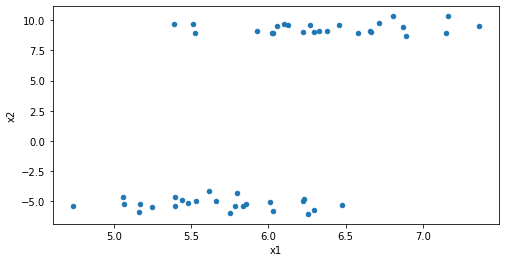

In [2]:
# Generate some wispy "sandwich" blobs
X, color = make_blobs(n_samples=50, random_state=13, centers=2, cluster_std=.5, )
X_map = map(lambda x: (x[0][0], x[0][1], color[x[1]]), zip(X, color))

points = pd.DataFrame(list(X_map), columns=["x1", "x2", "color"])
ax = points.plot(kind="scatter", x="x1", y="x2", figsize=(8, 4))


In [3]:
# How many clusters does it look like we have?

Next, we'll implement the actual clustering algorithm using the **`single linkage`** method (described in detail earlier):

In [4]:
# Inspect Z linkage matrix
Z = linkage(X, 'single')

#### What does this matrix mean?

> _"A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster."_


In [5]:
# Put Z in to DataFrame for easy display
link = pd.DataFrame(Z, columns=['cluster_index_left', 'cluster_index_right', 'distance', 'support'])
link

,cluster_index_left,cluster_index_right,distance,support
0,14.0,46.0,0.016601,2.0
1,0.0,4.0,0.060149,2.0
2,6.0,51.0,0.061095,3.0
3,7.0,18.0,0.070737,2.0
4,34.0,52.0,0.073546,4.0
5,27.0,39.0,0.082249,2.0
6,9.0,55.0,0.086783,3.0
7,13.0,49.0,0.086841,2.0
8,2.0,53.0,0.110434,3.0
9,40.0,57.0,0.111610,3.0


Now we can calculate the cophenetic correlation coefficient to see how well our algorithm has measured the distances between the points:

In [6]:
# Show cophenetic coefficient
c, coph_dists = cophenet(Z, pdist(X))
c

0.9972766699375051

You should see a **C** around **0.99**, which means that the distances of the clusters are highly related to the original distances of the data.

Now, let's plot the dendrogram. To do this, we call dendrogram from  `scipy.cluster.hierarchy` and input our links, and rotate the labels so we can view the graph in a more organized matter. 

#### We can then plot the denrogram with pyplot from matplotlib.

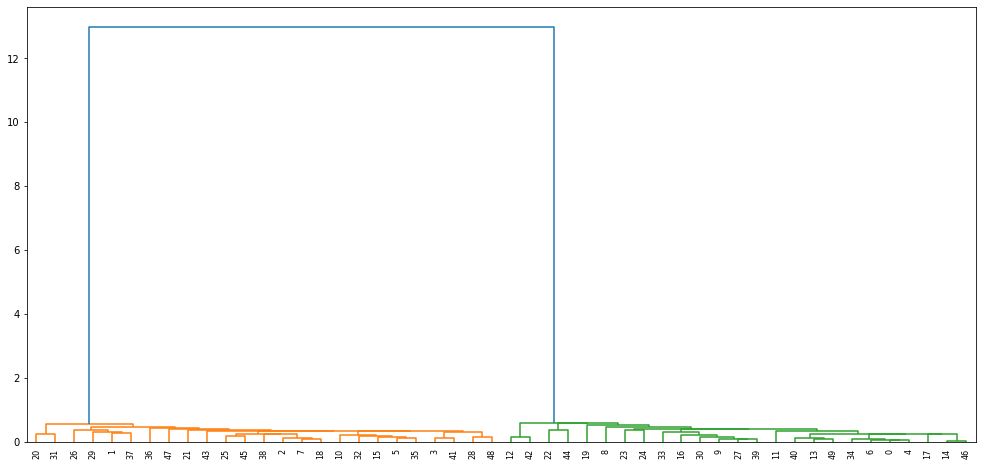

In [7]:
# We will plot a denrogram here
plt.figure(figsize=(17,8))
_ = dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

### Determining the clusters

While there are many ways to automate this process, we can visually assess the dendrogram and set a maximum distance to help estimate the clusters.

Here, we can see that no links exist above a distance of 2 - use the ```fclusters``` function from ```scipy.cluster.hierarchy``` with this max distance to return our cluster IDs. 

In [8]:
max_dist = 2 # pairwise distance

# Fcluster here
points['cluster'] = fcluster(Z, max_dist, criterion='distance')
points.head()

,x1,x2,color,cluster
0,6.328142,9.100035,0,2
1,6.293391,-5.771864,1,1
2,5.857193,-5.262561,1,1
3,5.172031,-5.198541,1,1
4,6.381896,9.127024,0,2


Last, let's plot our data and assign the class labels as the color:

<AxesSubplot:xlabel='x', ylabel='y'>

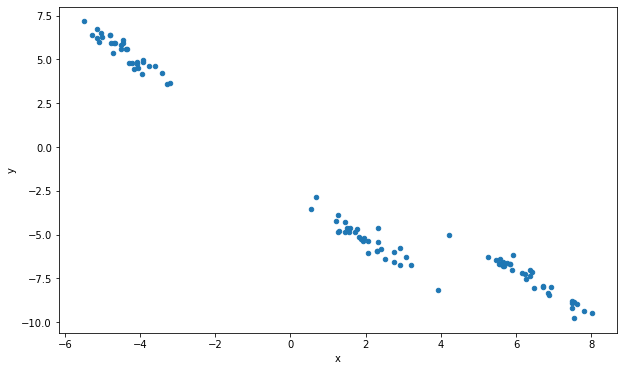

In [9]:
# Lets generate a new dataset that is a little more interesting
random_state = 161
X, y = make_blobs(n_samples=100, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

noisy_moons = pd.DataFrame(X, columns=["x", "y"])
noisy_moons.plot(kind="scatter", x="x", y="y", figsize=(10, 6))

In [10]:
# Calculate Z single linkage
Z = linkage(X, 'single')

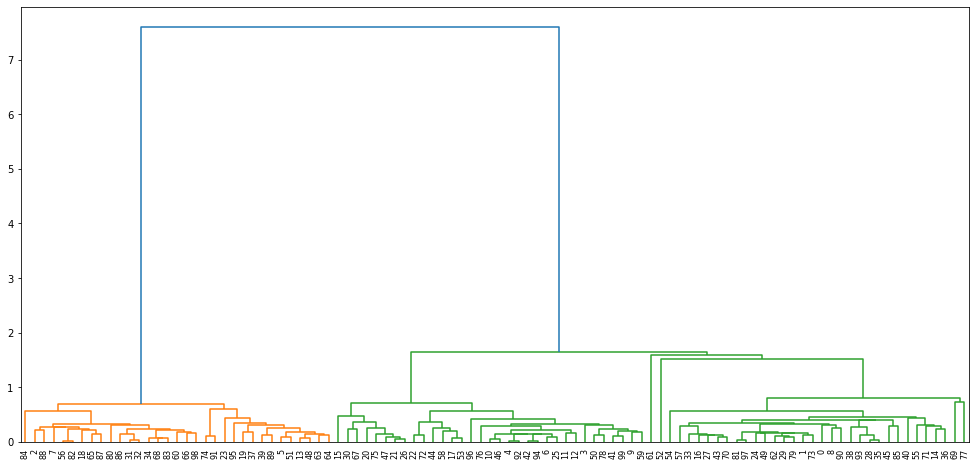

In [11]:
# Display dendrogram
plt.figure(figsize=(17,8))
dend = dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
    # link_color_func=lambda color: cmaps['Miscellaneous'],
)

In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

In [13]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print("Clusters represented at distance: ", set(clusters))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 4))

    # only using dimension 0 and 6 -- you can update this for your own implementations
    ax[0].scatter(X[:,0], X[:,1], c=clusters, cmap=cm.jet, s=40)
    ax[0].set_title("Max Dist: %d" % max_dist)
    
    # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
    ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax[1].plot((0, 1000), (max_dist, max_dist), 'r--')
    
    ax[1].set_title('Dendrogram')
    ax[1].set_xlabel('Index Numbers')
    ax[1].set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        # link_color_func=lambda color: cmaps['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

In [14]:
interact(plot_wrapper, max_dist=FloatSlider(min=0, max=3, step=.25));

interactive(children=(FloatSlider(value=0.0, description='max_dist', max=3.0, step=0.25), Output()), _dom_clas…

Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
Clusters represented at distance:  {1, 2, 3, 4, 5}
Clusters represented at distance:  {1, 2}


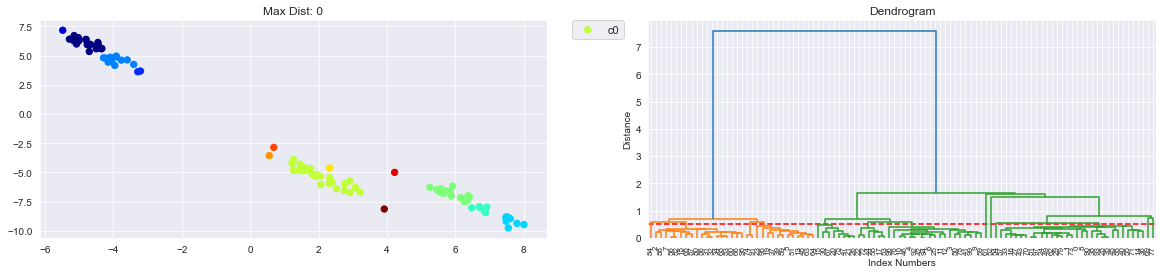

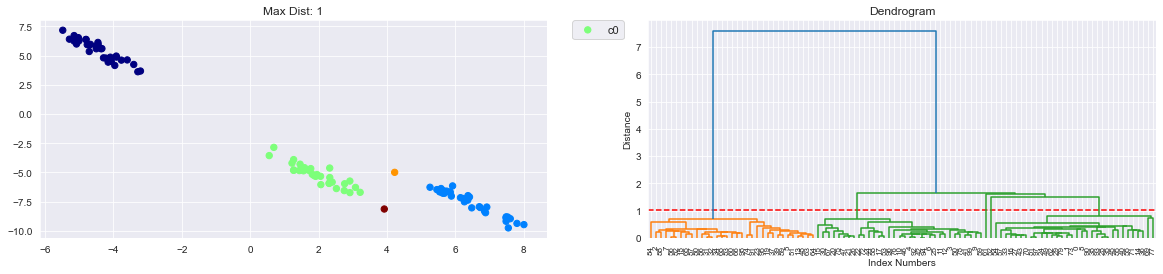

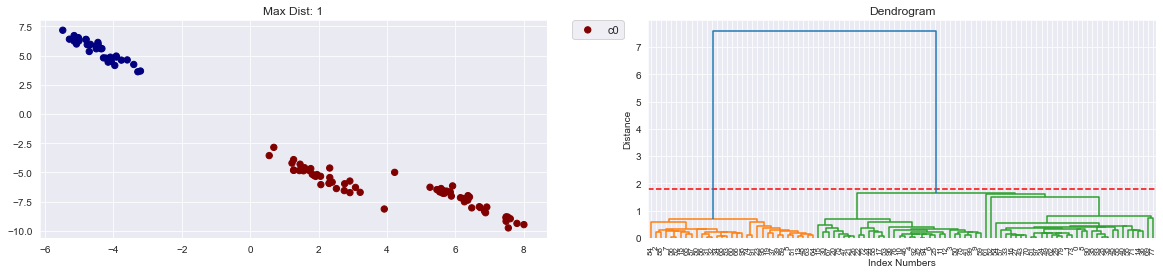

In [15]:
## You can use reuse this function if you like to test different distance threasholds

# plot_dist_thresh(250)
# plot_dist_thresh(200)
# plot_dist_thresh(150)
plot_dist_thresh(.5)
plot_dist_thresh(1.02)
plot_dist_thresh(1.8)

### The Biggest Caveat

While you can achieve good results with heirachical clustering, it is one of the most computationally ineffecient methods compared to others.  Let's take a sizeable dataset (10k records) and comapre and contrast with _K-Means_.

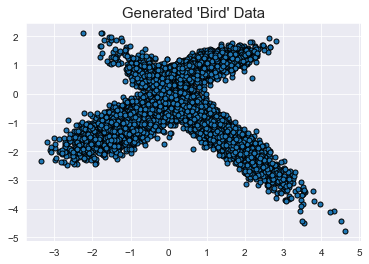

In [16]:
from sklearn.datasets import make_classification

np.random.seed(42)

plt.title("Generated 'Bird' Data",
          fontsize=15)
data, _ = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

rdf = pd.DataFrame(data, columns=["x1", "x2"])

plt.scatter(rdf["x1"], rdf["x2"], marker='o', s=25, edgecolor='k')

Wall time: 115 ms


<AxesSubplot:xlabel='x1', ylabel='x2'>

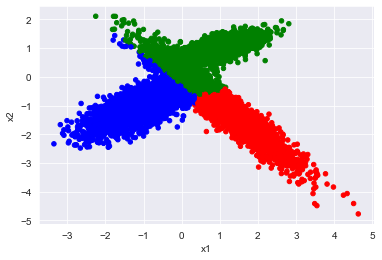

In [17]:
from sklearn.cluster import KMeans

colors = ["red", "green", "blue"]

kmeans = KMeans(n_clusters=3)
%time model  = kmeans.fit(rdf[["x1", "x2"]])

rdf['kmeans_cluster'] = model.labels_
centroids = pd.DataFrame(model.cluster_centers_)

rdf.plot(kind="scatter", x="x1", y="x2", c=rdf['kmeans_cluster'].map(lambda c: colors[c]))



In [18]:
## This operation can crash a notebook... BEWARE!

max_distance = 80

X = rdf[["x1", "x2"]].as_matrix()

%time Z = linkage(X, 'ward') # This operation is much much slower than K-Means
clusters = fcluster(Z, max_distance, criterion='distance')

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

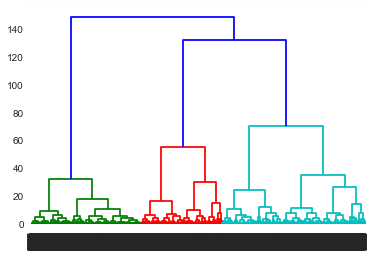

In [ ]:
## This also takes a while to run as well.. might skip this in lecture (This may take a few minutes to complete!  Beware!)
_ = dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

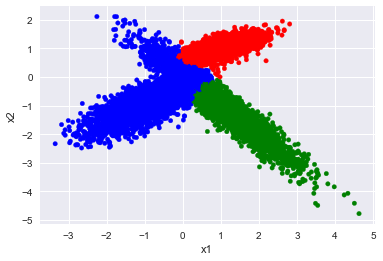

In [ ]:
rdf["agglom_clusters"] = clusters
rdf.plot(kind="scatter", x="x1", y="x2", c=rdf['agglom_clusters'].map(lambda c: colors[c-1]))

<a name="conclusion"></a>
## Conclusion
---

- Recall the definitions of linkage, cophenetic coefficient, and dendrogram
- Recap and recall the process steps in hierachical clustering
    - Linkage: First, we create the linkages in python that form the basis of our analysis
    - Cophenetic Coefficient: We find the cophenetic coefficient to determine how well our analysis is running
    - Dendrogram: We plot the dendrogram and visually inspect the clusters
    - Lastly, we find our cluster ID's and plot

<a id='resources'></a>
## Additional resources 

---

- [SciPy Documentation for Linkage techniques](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.cluster.hierarchy.linkage.html)
- [What even is this Hierarchical Clustering Thing, Anyway?](http://www.saedsayad.com/clustering_hierarchical.htm)
- [SKlearn docs](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) on hierarchical clustering
- [Stanford walkthrough of hierarchical clustering](http://www.econ.upf.edu/~michael/stanford/maeb7.pdf)
- [Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering) on hierarchical clustering
- [Example of hierarchical clustering US cities](http://www.analytictech.com/networks/hiclus.htm)
- [Cophenetic correlation wikipedia](https://en.wikipedia.org/wiki/Cophenetic_correlation) on cophrenetic coefficients
- [Cophenetic intuitive explanation](http://people.revoledu.com/kardi/tutorial/Clustering/Cophenetic.htm) of cophrenetic coefficients
- [Joseph Nelson's video](https://www.youtube.com/watch?v=62cphKGR0_s) explaining hierarchical clustering in seven minutes 
- A contrasting example of differing [cophrenetic coefficients](http://stats.stackexchange.com/questions/33066/on-cophenetic-correlation-for-dendrogram-clustering)

In [22]:
lang = pd.read_csv('datasets/lang.csv')

In [24]:
lang

,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
0,1,0,0,0,0,21,100,2,1,10,2,1,0
1,2,0,0,0,0,5,3,0,0,11,100,1,0
2,3,0,2,3,0,10,7,1,1,100,12,7,1
3,4,0,0,0,0,41,47,100,100,16,2,2,0
4,5,0,0,0,0,14,15,0,59,44,2,1,0
5,6,0,0,0,0,31,100,4,1,92,10,0,0
6,7,0,0,0,0,100,7,0,0,15,3,2,0
7,8,0,0,0,0,9,0,0,0,10,1,2,100
8,9,0,0,0,0,18,100,1,1,4,2,1,0
9,10,0,0,0,0,21,83,1,2,64,23,3,1


In [36]:
# the scipy libray is quite akward 
# it usually doesnt playwith pandas 

X = lang.values
Z = linkage(X,'single')

# u can change to 'centroid' --> linkage(X,'centroid')

In [37]:
Z


array([[  0.        ,   8.        ,  10.48808848,   2.        ],
       [  6.        ,  15.        ,  17.29161647,   2.        ],
       [  5.        ,   9.        ,  37.12142239,   2.        ],
       [ 16.        ,  18.        ,  61.10646447,   4.        ],
       [  2.        ,   4.        ,  82.06704576,   2.        ],
       [ 19.        ,  20.        ,  85.98255637,   6.        ],
       [ 17.        ,  21.        , 108.57255639,   8.        ],
       [ 11.        ,  12.        , 115.41230437,   2.        ],
       [ 10.        ,  23.        , 117.38398528,   3.        ],
       [ 22.        ,  24.        , 117.98728745,  11.        ],
       [  3.        ,  25.        , 119.24764149,  12.        ],
       [  1.        ,  26.        , 120.0333287 ,  13.        ],
       [ 14.        ,  27.        , 121.44134387,  14.        ],
       [  7.        ,  28.        , 122.05736356,  15.        ],
       [ 13.        ,  29.        , 126.00396819,  16.        ]])

at 0th and 8th row combined to become one cluster 

if the index is less than the number of rows in the original shape, then it refers to a point in the data. else, its made up from previous cluster



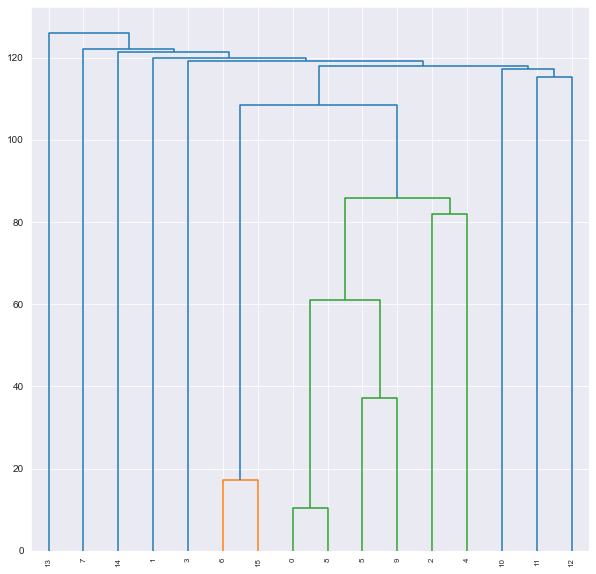

In [48]:
# Display dendrogram
plt.figure(figsize=(10,10))
dend = dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
    # link_color_func=lambda color: cmaps['Miscellaneous'],
)

In [39]:
fcluster(Z,175,criterion = 'distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)